Data sourced from [US Energy Information Administration: Direct Federal Financial Interventions and Subsidies in Energy in Fiscal Year 2016](https://www.eia.gov/analysis/requests/subsidy/pdf/subsidy.pdf)



# Annual Production in  trillion BTU

In [156]:
import numpy as np


raw_production = '''
U.S. Natural Gas (dry and liquids): 24,105 28,220 32,652
U.S. Crude Oil: 11,512 15,370 18,797
U.S. Coal: 21,657 20,223 14,807
U.S. Nuclear: 8,318 8,099 8,352
U.S. Biomass: 4,358 4,680 4,963
U.S. Hydroelectric: 2,588 2,582 2,482
U.S. Wind: 863 1,557 2,038
U.S. Solar: 88 205 533
U.S. Geothermal: 207 215 209
''' # Table Table 1. Total energy subsidies and support and selected energy indicators, FY 2010, FY 2013, and FY2016

production_dict = {}
for row in raw_production.split('\n')[1:-1]:
    key = row.split(':')[0]
    data = np.array(row.split(':')[1].replace(',','').split(' ')[1:],dtype=float)
    production_dict[key] = {2010:data[0],2013:data[1],2016:data[2]}



# Annual Subsidies by Support Type for Renewables:

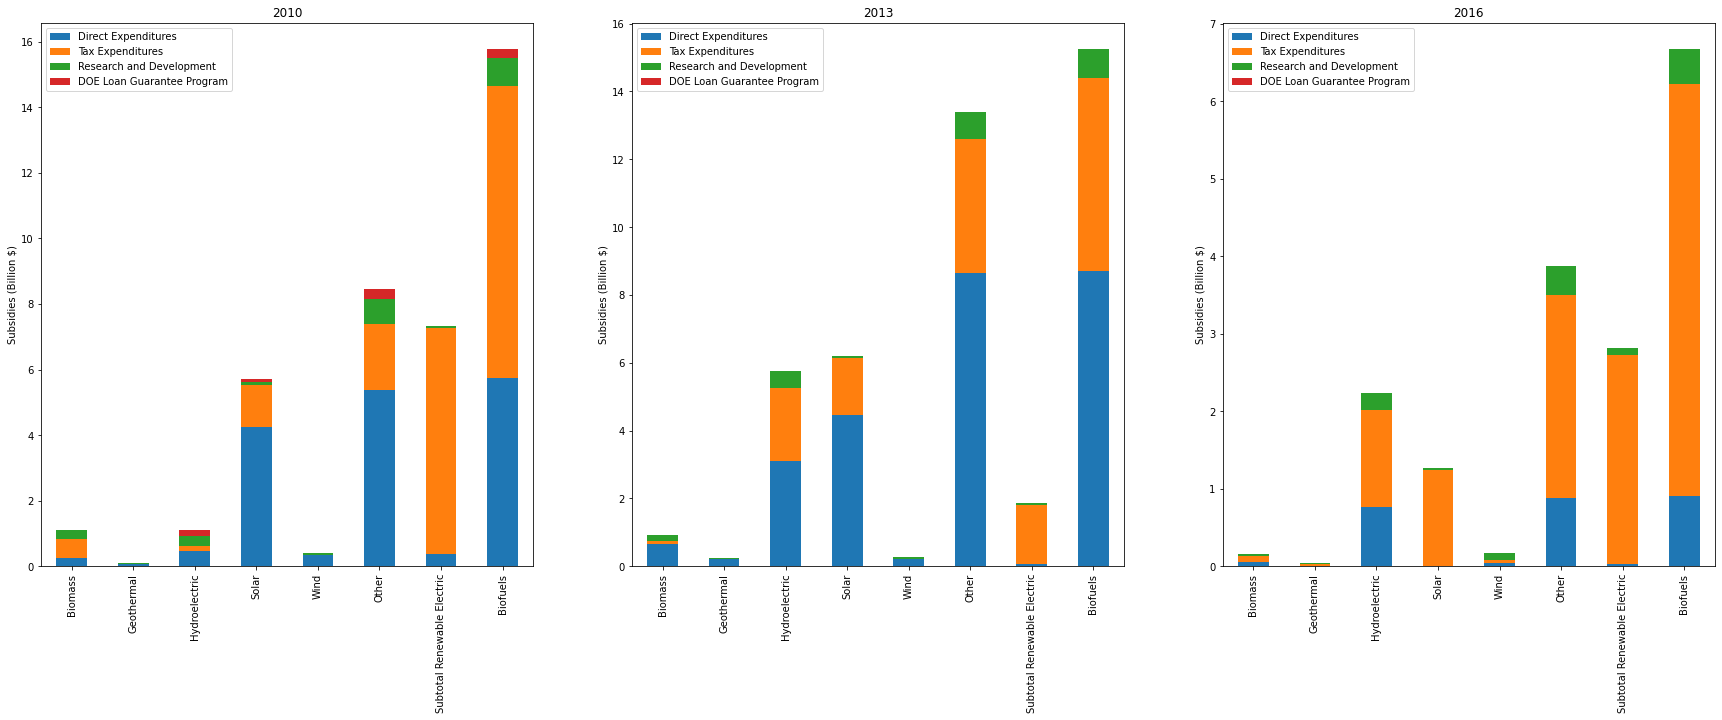

In [152]:
import re
import pandas as pd
import matplotlib.pyplot as plt
raw_support = '''
2010
Direct Expenditures: 185 67 63 481 4,241 330 5,369 363 5,732 36%
Tax Expenditures: 575 1 19 132 1,297 - 2,023 6,890 8,913 56%
Research and Development: 277 1 13 313 74 79 757 86 844 5%
DOE Loan Guarantee Program: - 13 - 190 94 - 297 - 296 2%
Total: 1,037 83 95 1,116 5,705 410 8,446 7,340 15,785 100%
Share of Total Renewables: 7% 1% 1% 7% 36% 3% 54% 46% 100%
2013
Direct Expenditures: 346 325 205 3,094 4,454 218 8,642 75 8,716 57%
Tax Expenditures: 48 32 18 2,164 1,682 - 3,944 1,740 5,683 37%
Research and Development: 178 1 10 499 51 63 802 62 864 6%
DOE Loan Guarantee Program: - - - - - - - - - -
Total: 572 358 233 5,756 6,187 280 13,387 1,878 15,264 100%
Share of Total Renewables: 4% 2% 2% 38% 41% 2% 88% 12% 100%
2016
Direct Expenditures: 18 41 2 771 4 41 877 33 909 14%
Tax Expenditures: 34 34 34 1,251 1,239 34 2,626 2,690 5,316 80%
Research and Development: 27 10 2 209 24 95 367 90 456 7%
DOE Loan Guarantee Program: - - - - - - - - - -
Total: 79 86 38 2,231 1,266 169 3,869 2,813 6,682 100%
'''


column_heads_raw = '''
Biomass
Geothermal
Hydroelectric
Solar
Wind
Other
Subtotal Renewable Electric
Biofuels
Total Renewables
'''

column_heads = column_heads_raw.splitlines()[1:]
column_heads_re = column_heads
year = None
raw_support = re.sub('-','0',raw_support)
subsidies_re = {}
subsidies_df = []
for row in raw_support.splitlines():
    
    support_type = None

    try:
        year = int(row)
        subsidies_re[year] = {}
    except:
        try:
            (support_type,data_raw) = row.split(':')
            data_raw = re.sub('%', '',data_raw)
            data_raw = re.sub(',','',data_raw)
            data = []
            for d in data_raw.split(' ')[1:]:
                data.append(float(re.sub(r'^\((.*?)\)$', r'-\1', d).replace(',',''))*1.0e-3)
            data[1] = data[1]+data[0]
            data = data[1:]
        except:
            pass
    if year != None and support_type != None:
        if('Total' not in support_type):
            data_dict = {}
            for i,d in enumerate(data[:-1]):
                data_dict[column_heads[i]] = d
            subsidies_re[year][support_type] = data_dict

subsidies_re_df = pd.DataFrame(subsidies_re)

df = subsidies_re_df

# plt.subplots(1,3)
plt.figure(figsize=(30,10))
fig = plt.gcf()
# ax = plt.gca()
for i,year in enumerate(subsidies_re.keys()):

    df = pd.DataFrame(subsidies_re[year])
    ax = fig.add_subplot(1,3,i+1)
    df.plot.bar(stacked='true',ax=ax,title=str(year))
    plt.ylabel('Subsidies (Billion $)')

# Annual Subsidies by Support Type For All:

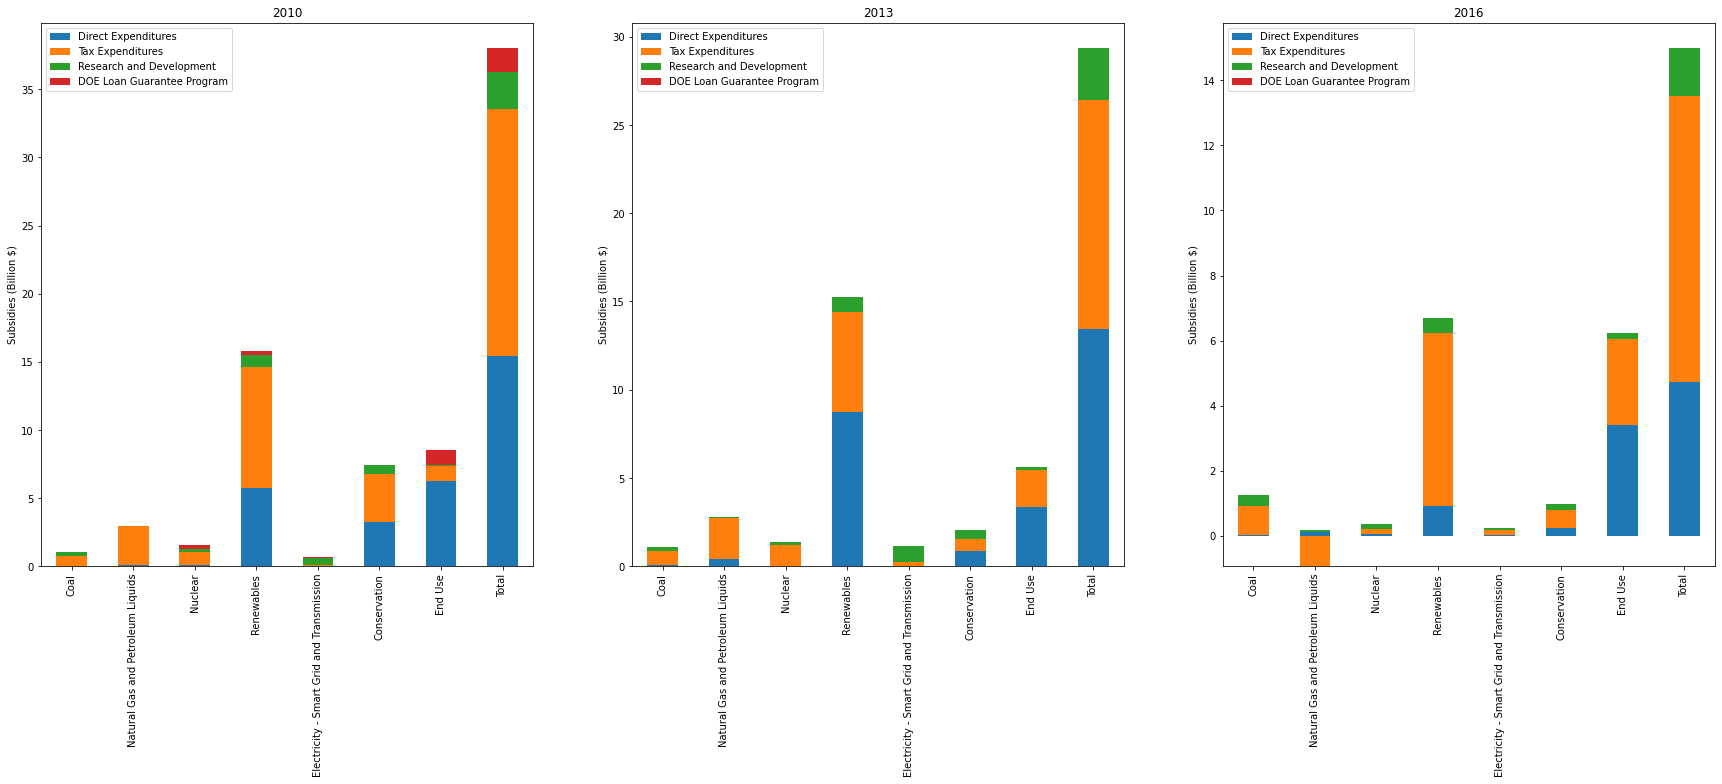

In [153]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
raw_support = '''
2010
Direct Expenditures: 48 - 83 69 5,732 4 3,226 6,264 15,427 41%
Tax Expenditures: 506 187 2,883 999 8,913 63 3,511 1,055 18,119 48%
Research and Development: 320 - 10 177 844 566 704 97 2,718 7%
DOE Loan Guarantee Program: - - - 292 296 22 4 1,113 1,728 5%
Total: 875 187 2,976 1,537 15,785 655 7,446 8,530 37,992 100%
Share of Total: 2% 0% 8% 4% 42% 2% 20% 22% 100%
2013
Direct Expenditures: 77 - 388 38 8,716 9 872 3,349 13,450 46%
Tax Expenditures: 801 10 2,345 1,155 5,683 219 657 2,081 12,951 44%
Research and Development: 216 - 64 197 864 887 517 189 2,934 10%
DOE Loan Guarantee Program: - - - - - - - - - -
Total: 1,094 10 2,796 1,390 15,264 1,115 2,046 5,619 29,335 100%
Share of Total: 4% 0% 10% 5% 52% 4% 7% 19% 100%
2016
Direct Expenditures: 19 - 111 40 909 11 234 3,391 4,716 31%
Tax Expenditures: 906 - (940) 160 5,316 160 560 2,653 8,816 59%
Research and Development: 337 - 56 164 456 49 189 200 1,451 10%
DOE Loan Guarantee Program: - - - - - - - - - -
Total: 1,262 - (773) 365 6,682 220 983 6,244 14,983 100%
'''

column_heads_raw = '''
Coal
Natural Gas and Petroleum Liquids
Nuclear
Renewables
Electricity - Smart Grid and Transmission
Conservation
End Use
Total
'''

column_heads = column_heads_raw.splitlines()[1:]
year = None
raw_support = re.sub('-','0',raw_support)
subsidies = {}

subsidies_df = []
for row in raw_support.splitlines():
    
    support_type = None

    try:
        year = int(row)
        subsidies[year] = {}
    except:
        try:
            (support_type,data_raw) = row.split(':')
            data_raw = re.sub('%', '',data_raw)
            data_raw = re.sub(',','',data_raw)
            data = []
            for d in data_raw.split(' ')[1:]:
                data.append(float(re.sub(r'^\((.*?)\)$', r'-\1', d).replace(',',''))*1.0e-3)
            data[1] = data[1]+data[0]
            data = data[1:]
        except:
            pass
    if year != None and support_type != None:
        if('Total' not in support_type):
            data_dict = {}
            for i,d in enumerate(data[:-1]):
                data_dict[column_heads[i]] = d
            subsidies[year][support_type] = data_dict

subsidies_df = pd.DataFrame(subsidies)

df = subsidies_df

# plt.subplots(1,3)
plt.figure(figsize=(30,10))
fig = plt.gcf()
# ax = plt.gca()
for i,year in enumerate(subsidies.keys()):

    df = pd.DataFrame(subsidies[year])
    ax = fig.add_subplot(1,3,i+1)
    df.plot.bar(stacked='true',ax=ax,title=str(year))
    plt.ylabel('Subsidies (Billion $)')



# Meged Subsidies by Support Type

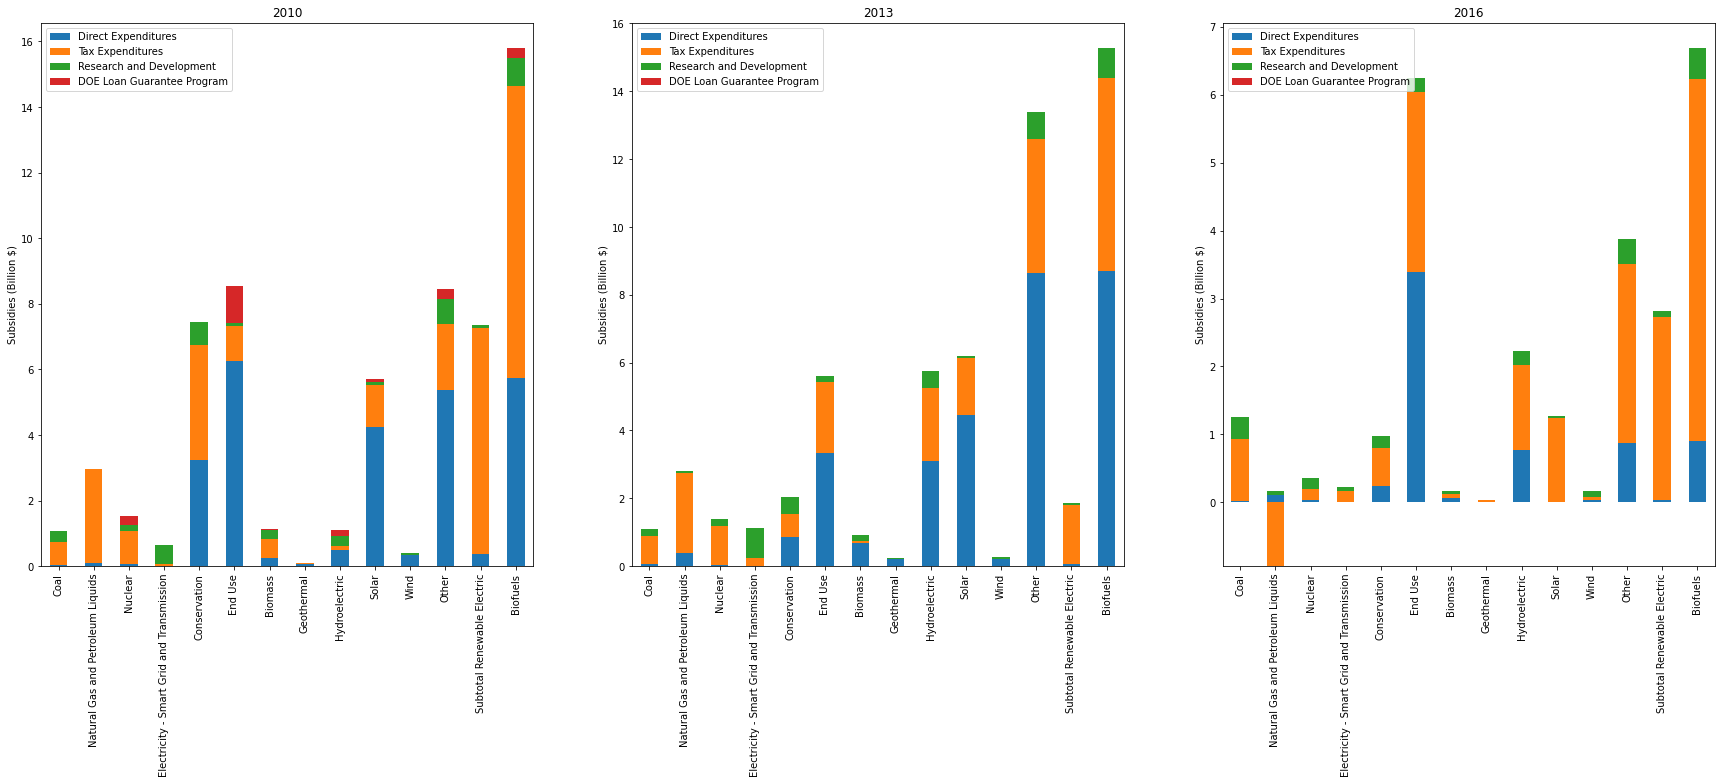

In [157]:




# plt.subplots(1,3)
plt.figure(figsize=(30,10))
fig = plt.gcf()
# ax = plt.gca()
for i,year in enumerate(subsidies.keys()):

    df1 = pd.DataFrame(subsidies[year])

    df1 = df1.drop(['Total','Renewables'])
    df2 = pd.DataFrame(subsidies_re[year])
    # df2.drop('Total')
    df = pd.concat([df1,df2])
    ax = fig.add_subplot(1,3,i+1)
    df.plot.bar(stacked='true',ax=ax,title=str(year))
    plt.ylabel('Subsidies (Billion $)')

# Levelized Subsidies

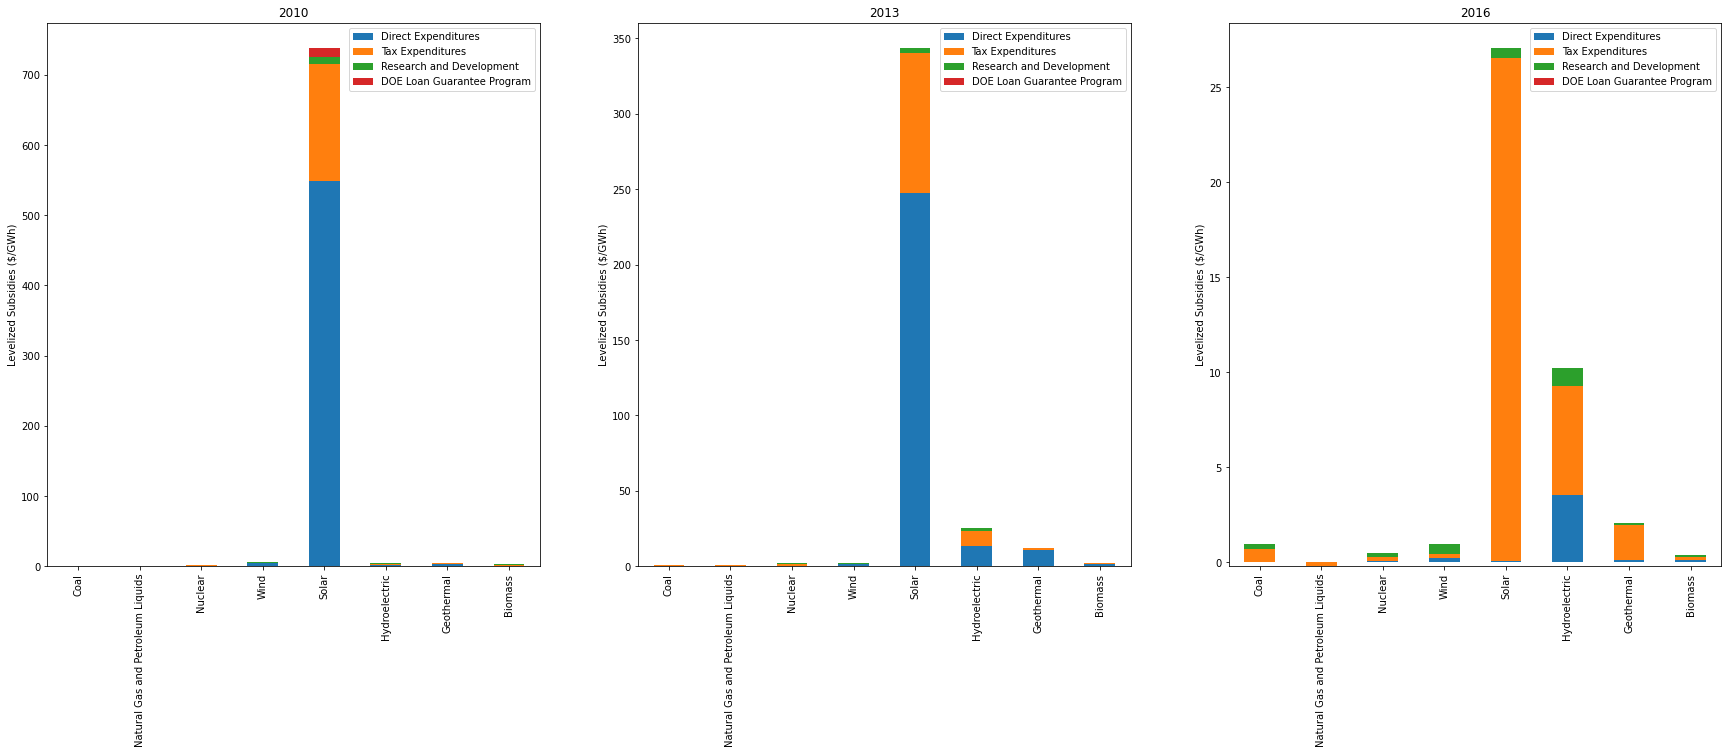

In [155]:
sub_to_prod_map = {
    'Coal': lambda year: production_dict['U.S. Coal'][year], 
    'Natural Gas and Petroleum Liquids': lambda year: production_dict['U.S. Crude Oil'][year]+production_dict['U.S. Natural Gas (dry and liquids)'][year], 
    'Nuclear': lambda year: production_dict['U.S. Nuclear'][year], 
    'Wind': lambda year : production_dict['U.S. Wind'][year],
    'Solar': lambda year: production_dict['U.S. Solar'][year],
    'Hydroelectric': lambda year: production_dict['U.S. Hydroelectric'][year],  
    'Geothermal': lambda year: production_dict['U.S. Geothermal'][year],      
    'Biomass': lambda year: production_dict['U.S. Biomass'][year]
    } 

subsides_levelized = {}
for i,year in enumerate(subsidies.keys()):
    subsides_levelized[year] = {}
    for spt in subsidies[year].keys():
        subsides_levelized[year][spt] = {}
        if('Total' not in spt):
            tmp = {**(subsidies[year][spt]), **(subsidies_re[year][spt]),}
            for src in sub_to_prod_map.keys():

                subsides_levelized[year][spt][src] = tmp[src]*1.0e6/(0.3*sub_to_prod_map[src](year)*293071.070172222*1.0e-3)

df = pd.DataFrame(subsides_levelized)

# plt.subplots(1,3)
plt.figure(figsize=(30,10))
fig = plt.gcf()
# ax = plt.gca()
for i,year in enumerate(subsides_levelized.keys()):

    df = pd.DataFrame(subsides_levelized[year])
    ax = fig.add_subplot(1,3,i+1)
    df.plot.bar(stacked='true',ax=ax,title=str(year))
    plt.ylabel('Levelized Subsidies ($/GWh)')    